<a href="https://colab.research.google.com/github/amartsin/Cell-Detection-Using-Image-Processing/blob/main/Cell_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import cv2
from numba import jit
import os
from matplotlib import pyplot as plt
import math
import csv
from sklearn import preprocessing
from google.colab.patches import cv2_imshow

In [10]:
"""
import matplotlib.pyplot as plt
plt.hist(gray_img.ravel(),256,[0,256])
plt.show()
"""

'\nimport matplotlib.pyplot as plt\nplt.hist(gray_img.ravel(),256,[0,256])\nplt.show()\n'

In [11]:
#+cv2.THRESH_OTSU

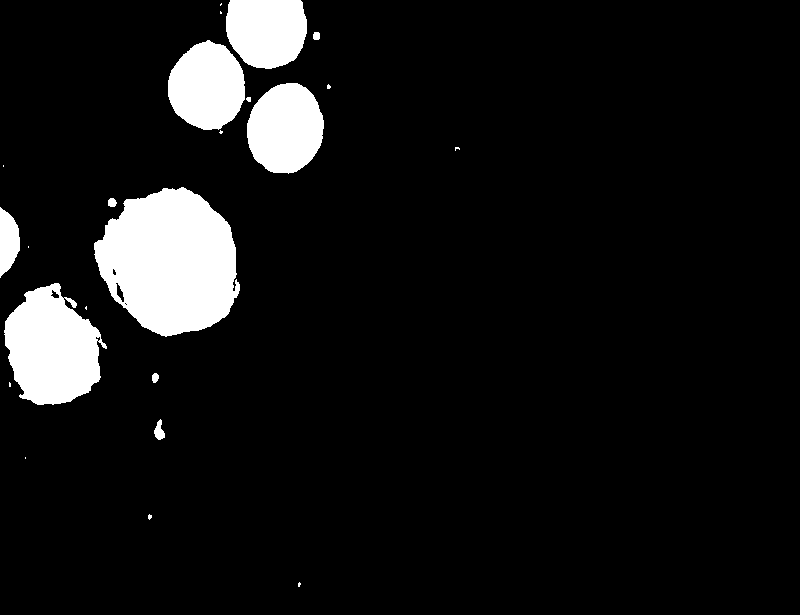

In [12]:
img= cv2.imread('cells_0_2102..jpeg')#3315 pores present
img=cv2.resize(img,(800,615))
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,thresh = cv2.threshold(gray_img,140,255,cv2.THRESH_BINARY_INV)
#kernel = np.ones((15,15), dtype = np.uint8) 
#thresh = cv2.dilate(thresh,kernel,3)
cv2_imshow(thresh)

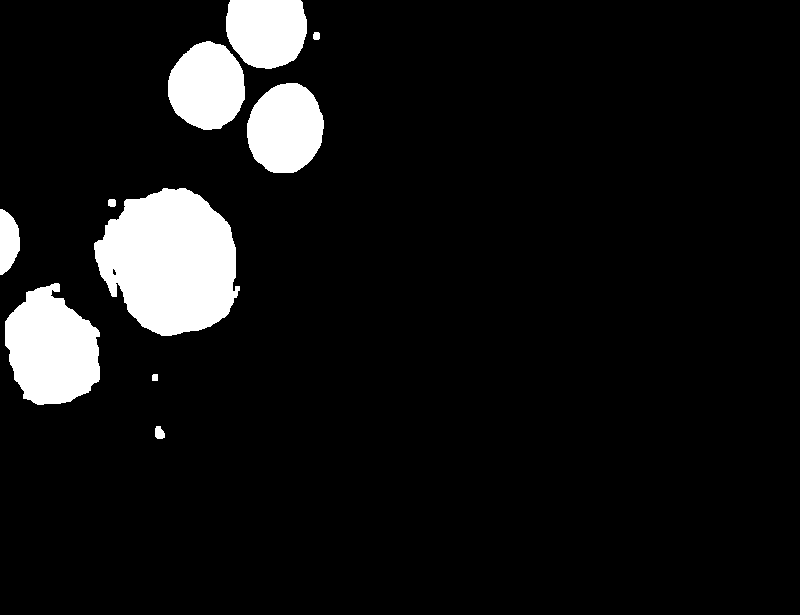

In [13]:
kernel = np.ones((5,5))#5,5 for normal
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
cv2_imshow(opening)

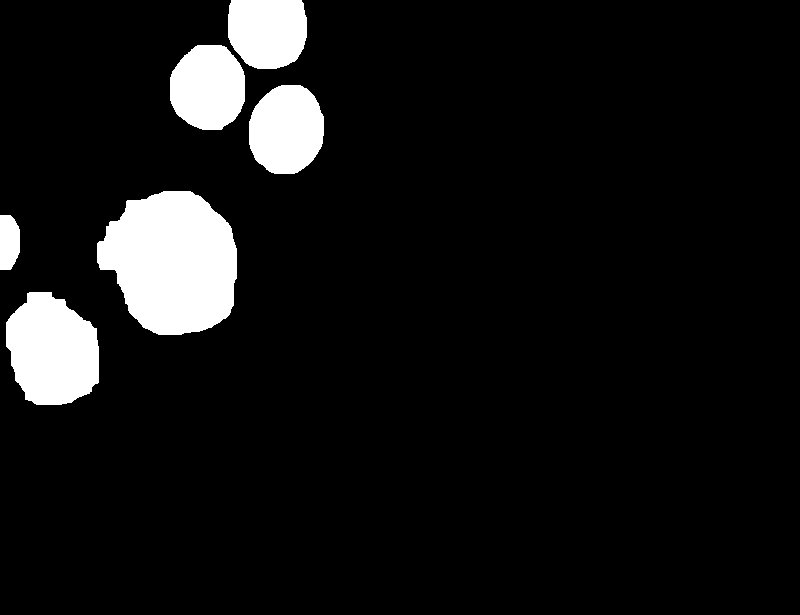

In [14]:
kernel = np.ones((20,20))
opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)

cv2_imshow(opening)

In [15]:
"""
kernel = np.ones((20,20))#(5,5) for Congested cells and (20,20)for other
opening = cv2.dilate(opening,kernel,3)
cv2_imshow(opening)
#comment it out for congested
"""

'\nkernel = np.ones((20,20))#(5,5) for Congested cells and (20,20)for other\nopening = cv2.dilate(opening,kernel,3)\ncv2_imshow(opening)\n#comment it out for congested\n'

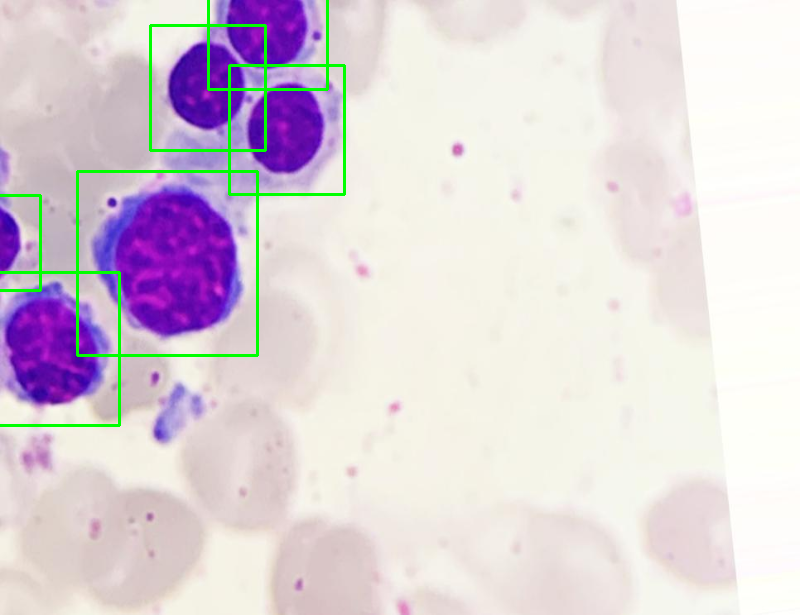

In [16]:
contours,hierarchy = cv2.findContours(opening,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
bound = [cv2.boundingRect(contour) for contour in contours]
img_copy = img.copy()
for i in bound:
  x,y,w,h = i #extract (x,y) coordinates and heght and width of the object
  cv2.rectangle(img_copy,(x-20,y-20),((x+w+20),(y+h+20)),(0,255,0),2) #draw the bounding rectangle
cv2_imshow(img_copy)